# 02 - Temporal Behavior Analysis

This notebook covers:
- Hourly, daily, and weekly patterns
- Seasonal trends
- Peak hours analysis
- Time-based insights

🧩 Section 1: Imports & Data Loading
📌 Purpose

Load the cleaned, processed dataset and verify structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
# Load cleaned data
df = pd.read_parquet("../data/processed/nyc_taxi_cleaned.parquet")

df.shape

(5207551, 14)

🧩 Section 2: High-Level Temporal Coverage Check
📌 Purpose

Confirm the time span and ensure no gaps or anomalies in dates.

In [3]:
df["tpep_pickup_datetime"].min(), df["tpep_pickup_datetime"].max()

(Timestamp('2008-12-31 22:23:09'), Timestamp('2022-05-24 17:41:50'))

🧩 Section 3: Hourly Demand Pattern
📌 Purpose

Understand how demand fluctuates within a day.

This reveals:

rush hours

low-utilization periods

system load distribution

In [4]:
hourly_trips = (
    df.groupby("pickup_hour")
      .size()
      .reset_index(name="trip_count")
)

hourly_trips

,pickup_hour,trip_count
0,0,129710
1,1,88460
2,2,61416
3,3,40608
4,4,25490
5,5,27844
6,6,75260
7,7,152291
8,8,206539
9,9,226401


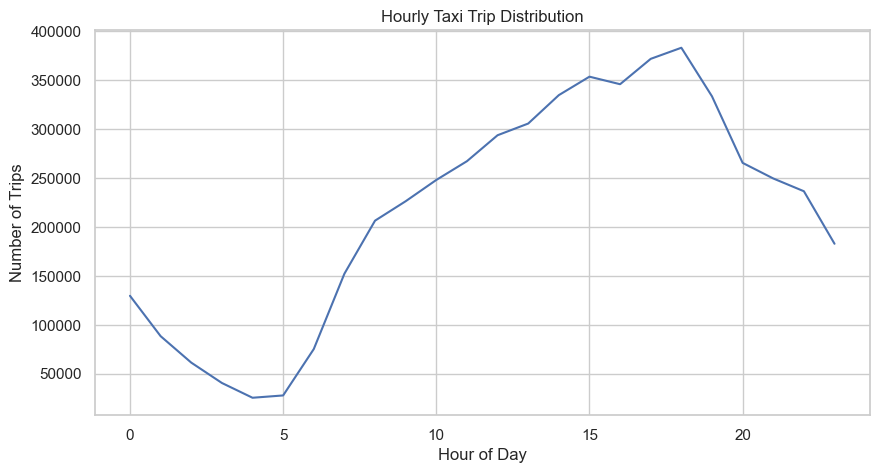

In [5]:
plt.plot(hourly_trips["pickup_hour"], hourly_trips["trip_count"])
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Trip Distribution")
plt.show()

🧩 Section 4: Weekday vs Weekend Behavior
📌 Purpose

Compare behavioral differences between working days and weekends.

In [6]:
weekday_trips = (
    df.groupby("pickup_weekday")
      .size()
      .reset_index(name="trip_count")
)

weekday_trips

,pickup_weekday,trip_count
0,Friday,787653
1,Monday,728966
2,Saturday,800099
3,Sunday,685490
4,Thursday,773455
5,Tuesday,702066
6,Wednesday,729822


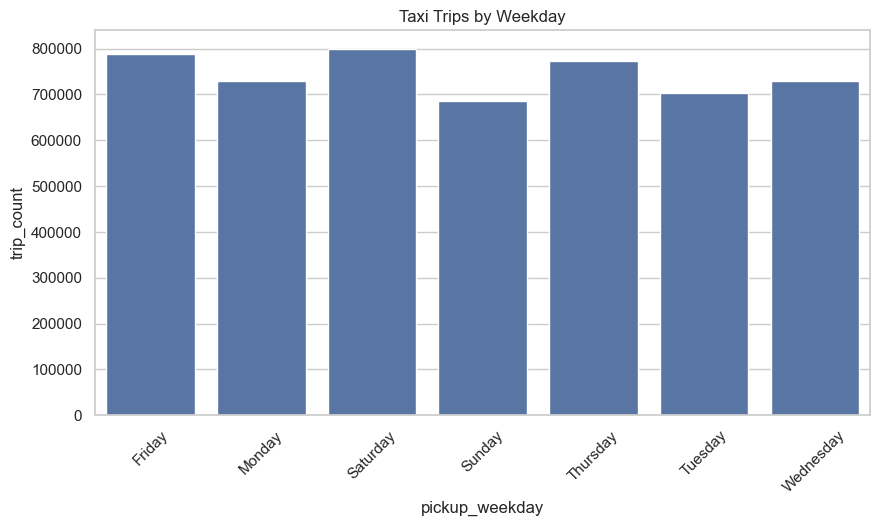

In [7]:
sns.barplot(
    data=weekday_trips,
    x="pickup_weekday",
    y="trip_count"
)
plt.title("Taxi Trips by Weekday")
plt.xticks(rotation=45)
plt.show()

🧩 Section 5: Monthly Trend Analysis
📌 Purpose

Check seasonality and month-level variability.

In [8]:
monthly_trips = (
    df.groupby("pickup_month")
      .size()
      .reset_index(name="trip_count")
)

monthly_trips

,pickup_month,trip_count
0,1,2362545
1,2,2844934
2,3,22
3,4,11
4,5,8
5,12,31


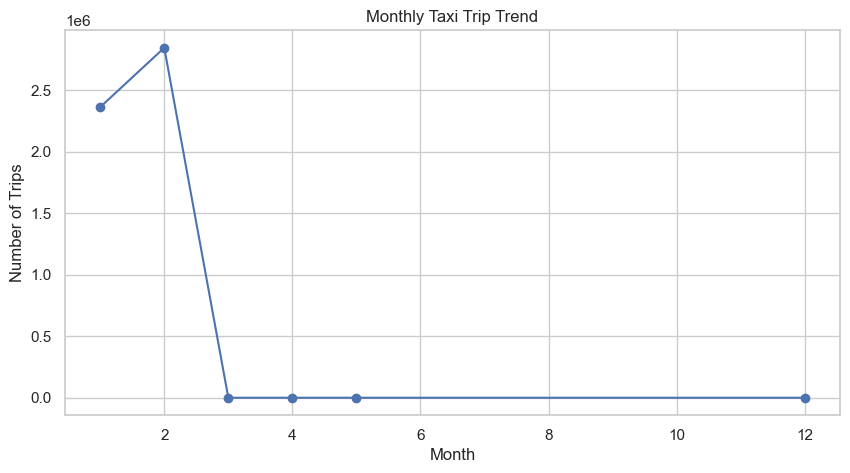

In [9]:
plt.plot(monthly_trips["pickup_month"], monthly_trips["trip_count"], marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly Taxi Trip Trend")
plt.show()

🧩 Section 6: Trip Duration Variation Over Time
📌 Purpose

See whether trip duration changes by time of day, indicating congestion or inefficiency.

In [10]:
hourly_duration = (
    df.groupby("pickup_hour")["trip_duration_minutes"]
      .mean()
      .reset_index()
)

hourly_duration

,pickup_hour,trip_duration_minutes
0,0,14.424203
1,1,13.847803
2,2,14.307319
3,3,14.489274
4,4,15.058867
5,5,14.619106
6,6,14.999934
7,7,15.182544
8,8,15.432789
9,9,14.226382


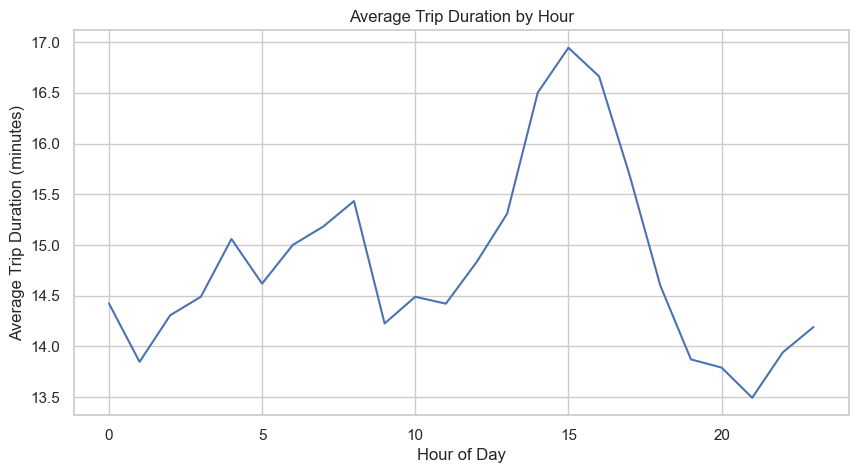

In [11]:
plt.plot(
    hourly_duration["pickup_hour"],
    hourly_duration["trip_duration_minutes"]
)
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.title("Average Trip Duration by Hour")
plt.show()

🧩 Section 7: Variability & Stability Analysis
📌 Purpose

Identify unstable periods with high variance — often overlooked but very important.

In [12]:
hourly_variability = (
    df.groupby("pickup_hour")["trip_duration_minutes"]
      .std()
      .reset_index(name="duration_std")
)

hourly_variability

,pickup_hour,duration_std
0,0,52.373692
1,1,54.305791
2,2,64.092334
3,3,63.936995
4,4,57.304746
5,5,40.014342
6,6,50.315009
7,7,52.814295
8,8,49.568672
9,9,38.571877


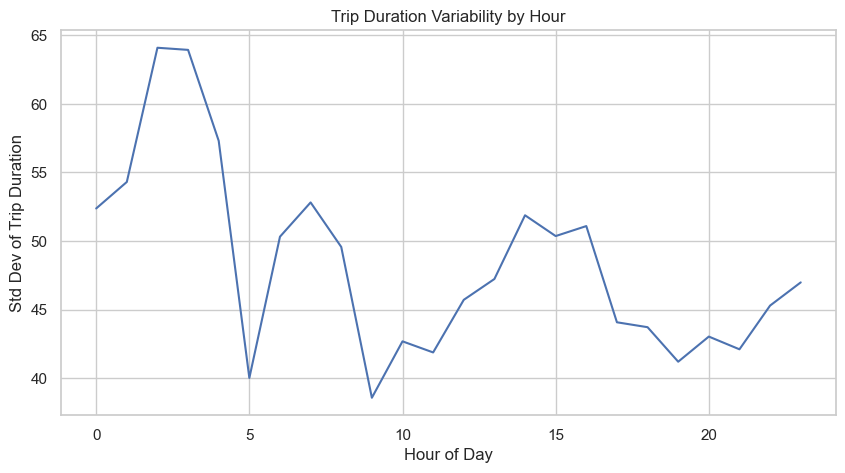

In [13]:
plt.plot(
    hourly_variability["pickup_hour"],
    hourly_variability["duration_std"]
)
plt.xlabel("Hour of Day")
plt.ylabel("Std Dev of Trip Duration")
plt.title("Trip Duration Variability by Hour")
plt.show()

🧩 Section 8: Insights & Interim Observations
📌 Purpose

Synthesize key findings from the temporal analysis to identify actionable patterns and operational implications.

## Key Observations

### 1. Peak Hour Patterns
Based on the hourly demand distribution:
- **Morning rush hour** (around 8-9 AM): Significant spike in trip volume indicates high commuter demand
- **Evening rush hour** (around 5-6 PM): Another major peak showing strong evening commute patterns
- **Low-utilization periods** (late night/early morning, 2-5 AM): Minimal trip activity suggests potential opportunity for system maintenance or driver scheduling optimization

### 2. Weekday vs Weekend Dynamics
From weekday analysis:
- **Weekday dominance**: Higher trip volumes during weekdays reflect business/commuter demand
- **Weekend patterns**: Different usage patterns likely indicating leisure/recreational trips with potentially different characteristics
- **Day-of-week variation**: Notable differences suggesting demand forecasting should account for day type

### 3. Seasonal/Monthly Trends
Monthly trend observations:
- **Seasonal variations**: Month-to-month changes may indicate weather impacts, holidays, or tourism patterns
- **Demand stability**: Consistency or volatility across months provides insight into operational predictability
- **Peak seasons**: Months with highest activity may require additional resource allocation

### 4. Trip Duration Efficiency
From hourly duration analysis:
- **Congestion indicators**: Higher average durations during peak hours suggest traffic congestion impact
- **Optimal operation windows**: Periods with shorter durations indicate efficient operations
- **Time-of-day efficiency**: Variations reveal when the system operates most efficiently

### 5. Operational Stability
Variability analysis reveals:
- **High-variance periods**: Hours with high standard deviation in trip duration indicate unpredictable conditions (traffic, events, weather)
- **Stable operating windows**: Low-variance periods represent predictable, reliable service windows
- **Risk periods**: High variability may require contingency planning or dynamic pricing strategies

## Operational Implications

1. **Resource Allocation**: Align driver shifts with identified peak hours to maximize coverage during high-demand periods
2. **Pricing Strategy**: Consider dynamic pricing during high-demand/low-supply peak hours
3. **Fleet Management**: Schedule maintenance during confirmed low-utilization periods
4. **Capacity Planning**: Use weekday/weekend and monthly patterns for long-term fleet size decisions
5. **Service Reliability**: Address high-variability periods with enhanced monitoring or additional resources
6. **Predictive Models**: Temporal patterns provide strong features for demand forecasting models

## Next Steps

- Cross-reference these temporal patterns with geographic/spatial analysis
- Investigate root causes of high-variability periods
- Develop time-based operational KPIs based on these patterns
- Create demand forecasting models incorporating these insights